# Seaborn

In [ ]:
import seaborn as sns
sns.set_theme(color_codes=True)

# load dataset from seaborn library. Reference: https://seaborn.pydata.org/generated/seaborn.load_dataset.html
tips = sns.load_dataset("tips")

In [ ]:
# Set syle. Reference: https://python-graph-gallery.com/104-seaborn-themes
sns.set_style("darkgrid")

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## Lineplot

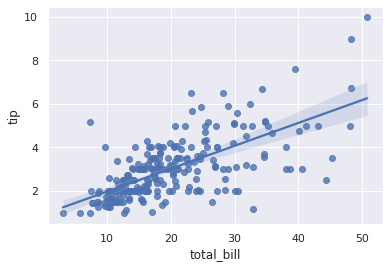

In [ ]:
ax = sns.regplot(x="total_bill", y="tip", data=tips)

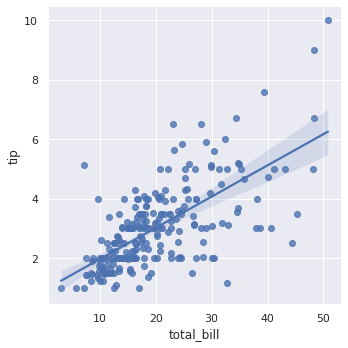

In [ ]:
ax = sns.lmplot(x="total_bill", y="tip", data=tips)

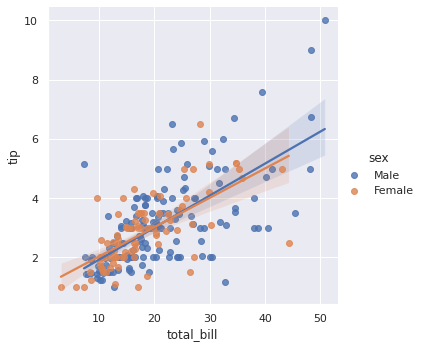

In [ ]:
g = sns.lmplot(x="total_bill", y="tip", hue="sex", data=tips)

## Scatterplot

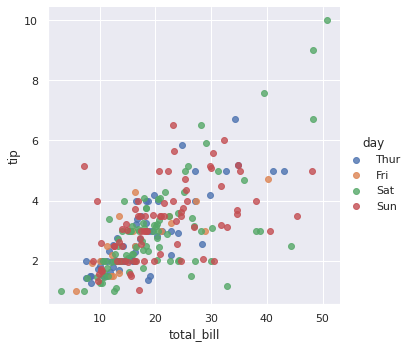

In [ ]:
ax = sns.lmplot(x="total_bill", y="tip", data=tips, fit_reg=False,  hue='day')  

## Bubble Chart

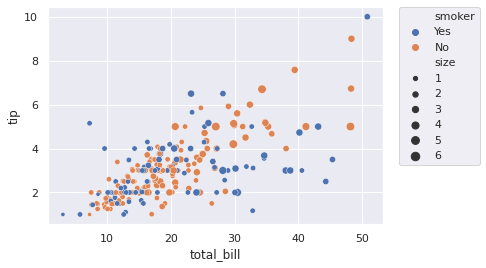

In [ ]:
ax = sns.scatterplot(x="total_bill", y="tip", data=tips, size="size", hue='smoker')  

# combine matplotlib with seaborn
import matplotlib.pyplot as plt
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Barchart

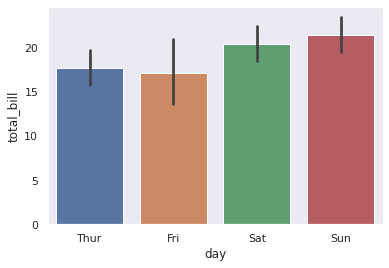

In [ ]:
ax = sns.barplot(x="day", y="total_bill", data=tips)

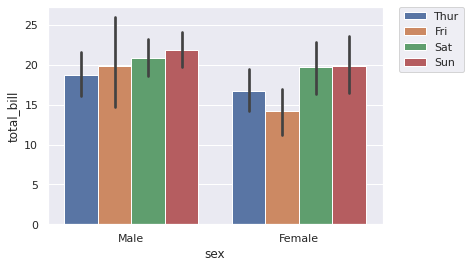

In [ ]:
ax = sns.barplot(x="sex", y="total_bill", hue="day", data=tips)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

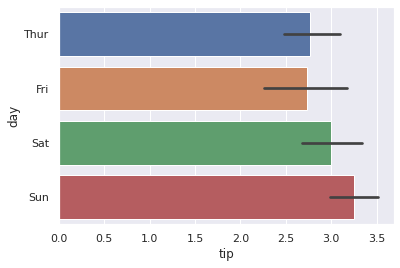

In [ ]:
ax = sns.barplot(x="tip", y="day", data=tips)

## Catplot

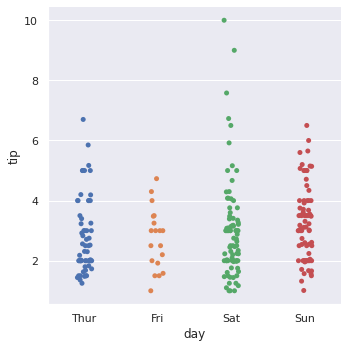

In [ ]:
g = sns.catplot(x="day", y="tip", data=tips)

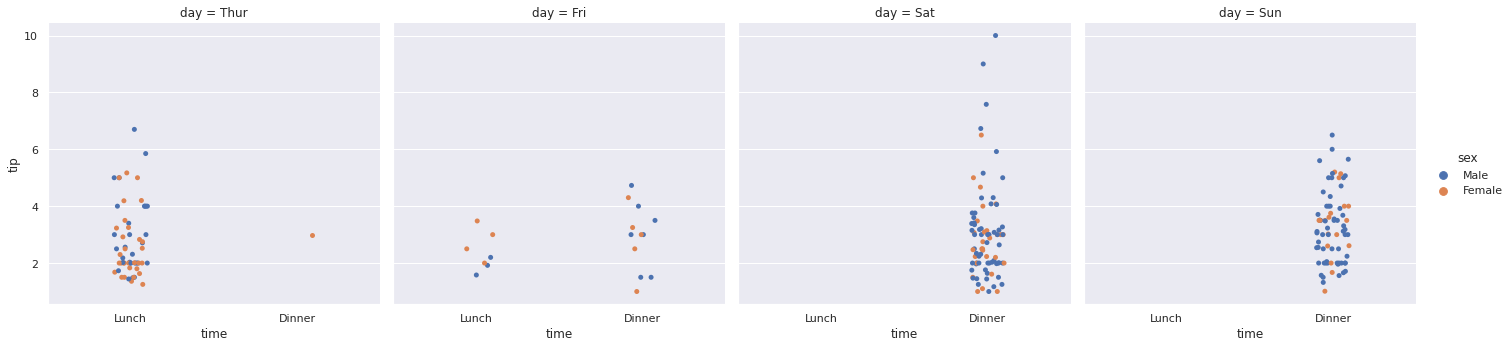

In [ ]:
g = sns.catplot(x="time", y="tip", hue="sex", col='day', data=tips)

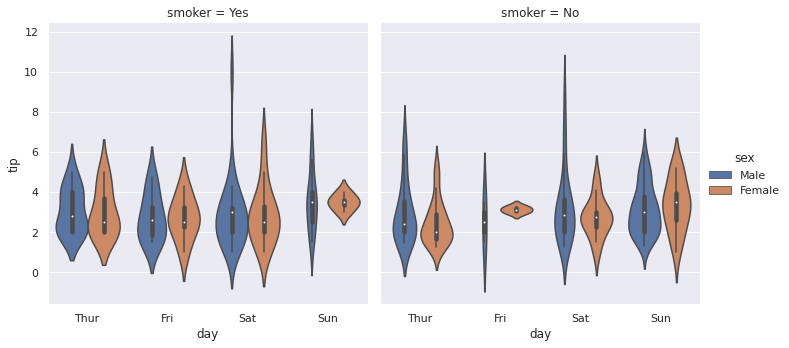

In [ ]:
# Add kind. Reference: https://seaborn.pydata.org/generated/seaborn.catplot.html
g = sns.catplot(x="day", y="tip", hue="sex", col='smoker', kind='violin', data=tips)

## Histogram

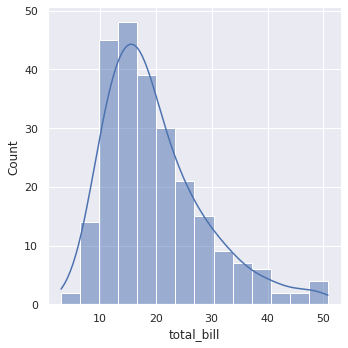

In [ ]:
# kde = Kernel Density Estimator
g = sns.displot(tips.total_bill, kde=True)

## Boxplot

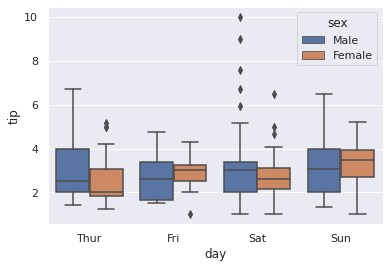

In [ ]:
g = sns.boxplot(x="day", y="tip", hue='sex', data=tips)

## Scatterplot Matrix

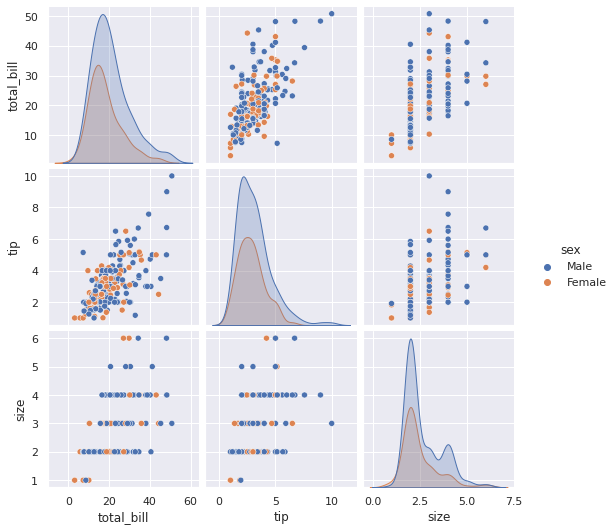

In [ ]:
g = sns.pairplot(tips, hue="sex")

## Correlation Heatmap

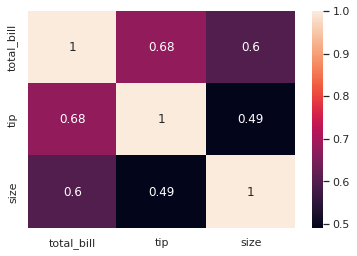

In [ ]:
sns.heatmap(tips.corr(), annot=True);

## Joint Plot

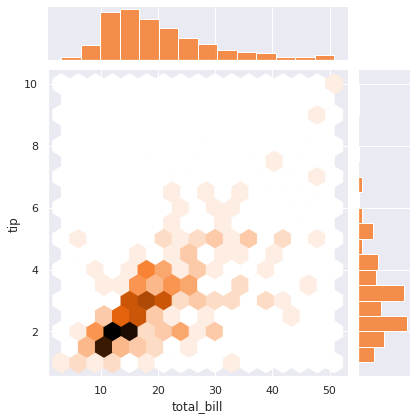

In [ ]:
g = sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex", color="#F76E11")

# Folium

In [ ]:
#!pip install folium
# Source https://www.analyticsvidhya.com/blog/2020/06/guide-geospatial-analysis-folium-python/#:~:text=Folium%20is%20a%20Python%20library,has%20the%20power%20of%20Leaflet.

import folium
m=folium.Map(location=[1.3396704621219861, 103.98355242289945], zoom_start=13)
m

### Markers

In [ ]:
m=folium.Map(location=[-6.556731, 106.725945],
             zoom_start=16)

tooltip = "Click me!"
folium.Marker( [-6.557373133349863, 106.7312903], popup="<i>FMIPA</i>", tooltip=tooltip).add_to(m)
folium.Marker( [-6.555666484674371, 106.72528758665811], popup="<i>Masjid Al-Hurriyah</i>", tooltip=tooltip).add_to(m)
m

### Choropleth

In [ ]:
#source: https://python-visualization.github.io/folium/quickstart.html

import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

state_data.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [ ]:
state_geo

'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'

In [ ]:
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

m

# Wordcloud

In [ ]:
# Source https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
# Import packages
!pip install wikipedia

import wikipedia
import re
# Specify the title of the Wikipedia page
wiki = wikipedia.page('Web scraping')
# Extract the plain text content of the page
text = wiki.content
# Clean text
text = re.sub(r'==.*?==+', ' ', text)
text = text.replace('\n', ' ')

In [ ]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(12, 9))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

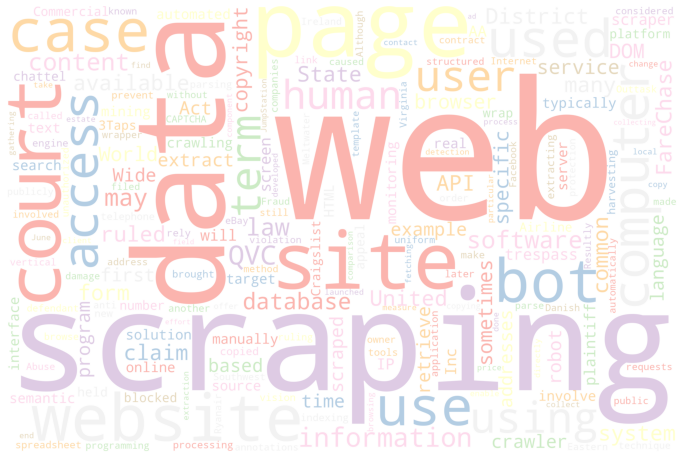

In [ ]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)